In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip uninstall tensorflow

In [ ]:
pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from tensorflow.keras.preprocessing import image,image_dataset_from_directory
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json
from keras.utils import to_categorical

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def convert_image_to_array(image_dir):
  try:
    image=cv2.imread(image_dir)
    if image is not None:
      image=cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error: {e}")
    return None

In [ ]:
!pip install gdown  # If not installed
!gdown --id 1Eqb10Peuw3WJZ2O7wBLzJfWfA0-uvS-G -O apple_dataset.npz

# https://drive.google.com/file/d/1Eqb10Peuw3WJZ2O7wBLzJfWfA0-uvS-G/view?usp=drive_link

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1foE0pTrBrzfI3nFNBzEegBDlgqTvduRD
From (redirected): https://drive.google.com/uc?id=1foE0pTrBrzfI3nFNBzEegBDlgqTvduRD&confirm=t&uuid=639cce0e-cb8f-410a-839c-0677f1890b73
To: /content/tomato_dataset.npz
100% 808M/808M [00:09<00:00, 83.5MB/s]


In [ ]:
data = np.load("/content/apple_dataset.npz")

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

In [11]:
x_train.shape

(3356, 256, 256, 3)

In [14]:
# Ensure eager execution is enabled
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [15]:
from tensorflow.keras.applications import VGG16, InceptionV3, DenseNet121
from keras.utils import plot_model

In [16]:
vgg16=VGG16(
    weights="imagenet",
    input_shape=(256,256,3),
    include_top=False
)
inception=InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256,3)
)
densenet=DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
vgg16.trainable=True
inception.trainable=True
densenet.trainable=True

In [18]:
vgg16.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [19]:
densenet.layers

[<InputLayer name=input_layer_2, built=True>,
 <ZeroPadding2D name=zero_padding2d, built=True>,
 <Conv2D name=conv1_conv, built=True>,
 <BatchNormalization name=conv1_bn, built=True>,
 <Activation name=conv1_relu, built=True>,
 <ZeroPadding2D name=zero_padding2d_1, built=True>,
 <MaxPooling2D name=pool1, built=True>,
 <BatchNormalization name=conv2_block1_0_bn, built=True>,
 <Activation name=conv2_block1_0_relu, built=True>,
 <Conv2D name=conv2_block1_1_conv, built=True>,
 <BatchNormalization name=conv2_block1_1_bn, built=True>,
 <Activation name=conv2_block1_1_relu, built=True>,
 <Conv2D name=conv2_block1_2_conv, built=True>,
 <Concatenate name=conv2_block1_concat, built=True>,
 <BatchNormalization name=conv2_block2_0_bn, built=True>,
 <Activation name=conv2_block2_0_relu, built=True>,
 <Conv2D name=conv2_block2_1_conv, built=True>,
 <BatchNormalization name=conv2_block2_1_bn, built=True>,
 <Activation name=conv2_block2_1_relu, built=True>,
 <Conv2D name=conv2_block2_2_conv, built=Tru

In [20]:
inception.layers

[<InputLayer name=input_layer_1, built=True>,
 <Conv2D name=conv2d, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Activation name=activation, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Activation name=activation_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <Activation name=activation_2, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <BatchNormalization name=batch_normalization_3, built=True>,
 <Activation name=activation_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <BatchNormalization name=batch_normalization_4, built=True>,
 <Activation name=activation_4, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_8, built=True>,
 <BatchNormalization name=batch_normalization_8, built=True>,
 <Activation name=activation_8, built=True>

In [21]:
## vgg16
set_trainable = False
for layer in vgg16.layers:
  if "block5" in layer.name:
    set_trainable=True
  if set_trainable:
    layer.trainable=False
  else:
    layer.trainable=True

In [22]:
## denseenet
flag=False
for layer in densenet.layers:
  if layer.name == "conv5_block15_2_conv":
    flag=True
  if flag:
    layer.trainable=False
  else:
    layer.trainable=True

In [23]:
## inception
flag=False
for layer in inception.layers:
  if layer.name == "conv2d_93":
    flag=True
  if flag:
    layer.trainable=False
  else:
    layer.trainable=True

In [24]:
for layer in vgg16.layers:
  print("Layer name :",layer.name," Is Trainable :",layer.trainable)

Layer name : input_layer  Is Trainable : True
Layer name : block1_conv1  Is Trainable : True
Layer name : block1_conv2  Is Trainable : True
Layer name : block1_pool  Is Trainable : True
Layer name : block2_conv1  Is Trainable : True
Layer name : block2_conv2  Is Trainable : True
Layer name : block2_pool  Is Trainable : True
Layer name : block3_conv1  Is Trainable : True
Layer name : block3_conv2  Is Trainable : True
Layer name : block3_conv3  Is Trainable : True
Layer name : block3_pool  Is Trainable : True
Layer name : block4_conv1  Is Trainable : True
Layer name : block4_conv2  Is Trainable : True
Layer name : block4_conv3  Is Trainable : True
Layer name : block4_pool  Is Trainable : True
Layer name : block5_conv1  Is Trainable : False
Layer name : block5_conv2  Is Trainable : False
Layer name : block5_conv3  Is Trainable : False
Layer name : block5_pool  Is Trainable : False


In [25]:
for layer in densenet.layers:
  print("Layer name :",layer.name," Is Trainable :",layer.trainable)

Layer name : input_layer_2  Is Trainable : True
Layer name : zero_padding2d  Is Trainable : True
Layer name : conv1_conv  Is Trainable : True
Layer name : conv1_bn  Is Trainable : True
Layer name : conv1_relu  Is Trainable : True
Layer name : zero_padding2d_1  Is Trainable : True
Layer name : pool1  Is Trainable : True
Layer name : conv2_block1_0_bn  Is Trainable : True
Layer name : conv2_block1_0_relu  Is Trainable : True
Layer name : conv2_block1_1_conv  Is Trainable : True
Layer name : conv2_block1_1_bn  Is Trainable : True
Layer name : conv2_block1_1_relu  Is Trainable : True
Layer name : conv2_block1_2_conv  Is Trainable : True
Layer name : conv2_block1_concat  Is Trainable : True
Layer name : conv2_block2_0_bn  Is Trainable : True
Layer name : conv2_block2_0_relu  Is Trainable : True
Layer name : conv2_block2_1_conv  Is Trainable : True
Layer name : conv2_block2_1_bn  Is Trainable : True
Layer name : conv2_block2_1_relu  Is Trainable : True
Layer name : conv2_block2_2_conv  Is Tr

In [26]:
## inception
for layer in inception.layers:
  print("Layer name :",layer.name," Is Trainable :",layer.trainable)

Layer name : input_layer_1  Is Trainable : True
Layer name : conv2d  Is Trainable : True
Layer name : batch_normalization  Is Trainable : True
Layer name : activation  Is Trainable : True
Layer name : conv2d_1  Is Trainable : True
Layer name : batch_normalization_1  Is Trainable : True
Layer name : activation_1  Is Trainable : True
Layer name : conv2d_2  Is Trainable : True
Layer name : batch_normalization_2  Is Trainable : True
Layer name : activation_2  Is Trainable : True
Layer name : max_pooling2d  Is Trainable : True
Layer name : conv2d_3  Is Trainable : True
Layer name : batch_normalization_3  Is Trainable : True
Layer name : activation_3  Is Trainable : True
Layer name : conv2d_4  Is Trainable : True
Layer name : batch_normalization_4  Is Trainable : True
Layer name : activation_4  Is Trainable : True
Layer name : max_pooling2d_1  Is Trainable : True
Layer name : conv2d_8  Is Trainable : True
Layer name : batch_normalization_8  Is Trainable : True
Layer name : activation_8  Is T

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

def create_model(base_model, name):
    inputs = Input(shape=(256,256,3))
    hidden1=base_model(inputs)
    hidden2=GlobalAveragePooling2D()(hidden1)
    hidden3=Dense(128,activation="relu")(hidden2)
    hidden4=Dropout(0.2)(hidden3)
    hidden5=Dense(64,activation="relu")(hidden4)
    hidden6=Dropout(0.2)(hidden5)
    output=Dense(4,activation="softmax")(hidden6)
    model = Model(inputs, output, name=name)
    return model

In [28]:
vgg16_model = create_model(vgg16, "VGG16")
inception_model = create_model(inception, "InceptionV3")
densenet_model = create_model(densenet, "DenseNet121")

In [29]:
vgg16_model.summary()

Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,788,803 (56.41 MB)

 Trainable params: 7,709,379 (29.41 MB)

 Non-trainable params: 7,079,424 (27.01 MB)

In [30]:
inception_model.summary()

Model: "InceptionV3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 6, 6, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,073,507 (84.20 MB)

 Trainable params: 21,645,347 (82.57 MB)

 Non-trainable params: 428,160 (1.63 MB)

In [31]:
densenet_model.summary()

Model: "DenseNet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 8, 8, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,177,155 (27.38 MB)

 Trainable params: 6,888,515 (26.28 MB)

 Non-trainable params: 288,640 (1.10 MB)

In [32]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model.png',show_shapes=True)

In [33]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,635,264 (29.13 MB)

 Non-trainable params: 7,079,424 (27.01 MB)

In [34]:
densenet.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 262, 262, 3)    │              0 │ input_layer_2[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 64, 64, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 64, 64, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 64, 64, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,748,864 (25.74 MB)

 Non-trainable params: 288,640 (1.10 MB)

In [35]:
inception.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 127, 127, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 127, 127, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 127, 127, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 125, 125, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 125, 125, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 125, 125, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 125, 125, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 125, 125, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 125, 125, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 62, 62, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 62, 62, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 62, 62, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 60, 60, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 60, 60, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,374,624 (81.54 MB)

 Non-trainable params: 428,160 (1.63 MB)

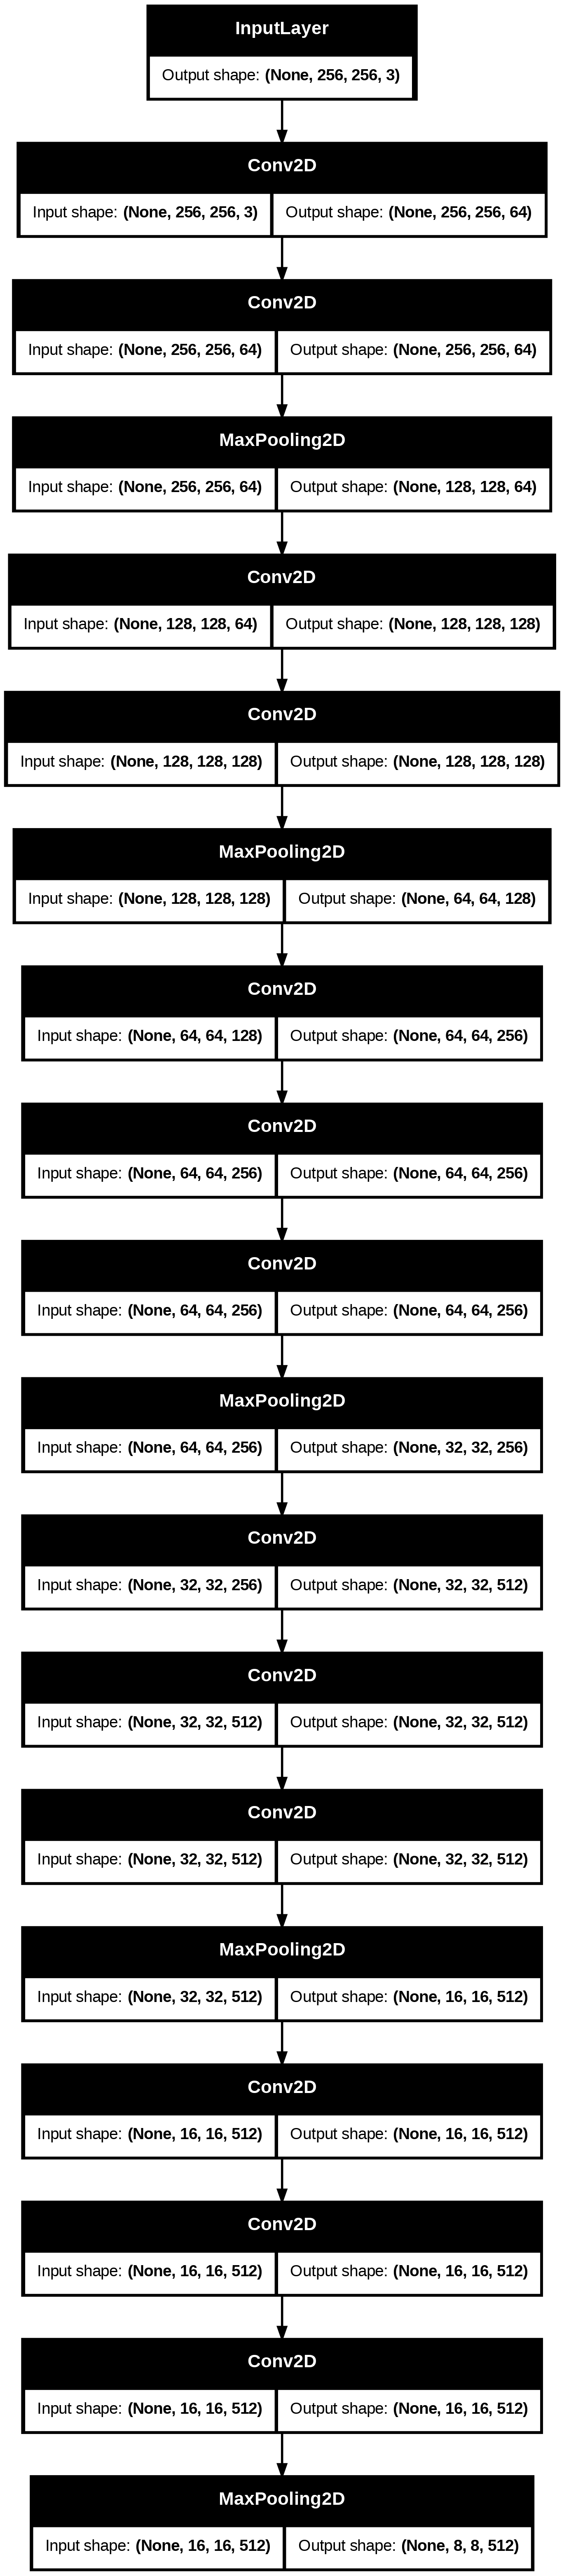

In [36]:
plot_model(vgg16,show_shapes=True)

In [37]:
from tensorflow.keras.optimizers import AdamW
optimizer = AdamW(learning_rate=1e-4, weight_decay=1e-4)
vgg16_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
inception_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
densenet_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
from sklearn.utils import resample
import numpy as np

def train_with_bootstrap(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=32):
    # Bootstrap Sampling: Select 80% of the training data with replacement
    subset_size = int(len(x_train) * 0.8)
    x_train_subset, y_train_subset = resample(x_train, y_train, replace=True, n_samples=subset_size, random_state=42)
    dataset_path = "/content/drive/MyDrive/densenet_dataset_for_apple.npz"

    # Save the dataset in Google Drive
    np.savez_compressed(dataset_path,
                        x_train_subset=x_train_subset,
                        y_train_subset=y_train_subset,
                        x_test=x_test,y_test=y_test)

    # Train the model on the bootstrapped subset
    history=model.fit(x_train_subset, y_train_subset, validation_data=(x_test, y_test),
              epochs=epochs, batch_size=batch_size, verbose=1)

    return history,model

In [ ]:
# history_vgg16,vgg16_model=train_with_bootstrap(vgg16_model,x_train, y_train,x_test,y_test,epochs=2,batch_size=32)

In [ ]:
# history_inception,inception_model=train_with_bootstrap(inception_model,x_train, y_train ,x_test,y_test,epochs=5,batch_size=32)

Epoch 1/5
15/51 ━━━━━━━━━━━━━━━━━━━━ 13:01 22s/step - accuracy: 0.4077 - loss: 1.1071

In [ ]:
history_densenet,densenet_model=train_with_bootstrap(densenet_model,x_train, y_train ,x_test,y_test,epochs=4,batch_size=32)

Epoch 1/5
50/51 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step - accuracy: 0.7086 - loss: 0.6403 

KeyboardInterrupt: 

In [ ]:
def save_to_collab(model,name):
  model.save("/content/drive/My Drive/"+name+"_for_apple_bagging_epoch(0-4).h5")
  with open("/content/drive/My Drive/"+name+"_for_apple_bagging_epoch(0-4).pkl", 'wb') as file:
    pickle.dump(model, file)


def save_to_local(model,name):
  model.save(name+"_for_apple_bagging_epoch(0-4).h5")
  with open(name+"_for_apple_bagging_epoch(0-4).pkl", 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle

# save_to_collab(vgg16_model,vgg16_model.name)
# save_to_collab(inception_model,inception_model.name)
save_to_collab(densenet_model,densenet_model.name)

# save_to_local(vgg16_model,vgg16_model.name)
# save_to_local(inception_model,inception_model.name)
save_to_local(densenet_model,densenet_model.name)

In [ ]:
def plot_accuracy_graph(history_model,model):
  plt.figure(figsize=(5,5))
  plt.plot(history_model.history["accuracy"],color="r")
  plt.plot(history_model.history["val_accuracy"],color="b")
  plt.title(model.name+" Model Accuracy _for_apple_bagging_epoch(0-4)")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["train","val"])
  save_path = "/content/drive/My Drive/accuracy_curve_densenet_for_apple_bagging_epoch(0-4).png"
  plt.savefig(save_path)
  plt.show()

In [ ]:
def plot_loss_graph(history_model,model):
  plt.figure(figsize=(5,5))
  plt.plot(history_model.history["loss"],color="r")
  plt.plot(history_model.history["val_loss"],color="b")
  plt.title(model.name+" Model loss _for_apple_bagging_epoch(0-4)")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["train","val"])
  save_path = "/content/drive/My Drive/loss_curve_densenet_for_apple_bagging_epoch(0-4).png"
  plt.savefig(save_path)
  plt.show()

### Accuracy

In [ ]:
# plot_accuracy_graph(history_vgg16,vgg16_model)

In [ ]:
# plot_accuracy_graph(history_inception,inception_model)

In [ ]:
plot_accuracy_graph(history_densenet,densenet_model)

## Loss

In [ ]:
# plot_loss_graph(history_vgg16,vgg16_model)

In [ ]:
# plot_loss_graph(history_inception,inception_model)

In [ ]:
plot_loss_graph(history_densenet,densenet_model)

## Accuracy curve

In [ ]:
def accuracy(model):
  print("Calculating model accuracy of "+model.name+"_for_apple_bagging_epoch(0-4)")
  scores=model.evaluate(x_test,y_test)
  print(f"Test Accuracy: {scores[1]*100}")

In [ ]:
# accuracy(vgg16_model)

In [ ]:
# accuracy(inception_model)

In [ ]:
accuracy(densenet_model)

In [ ]:
# y_pred=model.predict(x_test)

In [ ]:
# img=array_to_img(x_test[11])
# img

In [ ]:
# print("Original Label: ",all_labels[np.argmax(y_test[11])])
# print("Predicted Label: ",all_labels[np.argmax(y_pred[4])])
# print(y_pred[2])

In [ ]:
# for i in range(50):
#   print(all_labels[np.argmax(y_test[i])],"-",all_labels[np.argmax(y_pred[i])])